Tiny NB to get back into seaborn / pandas

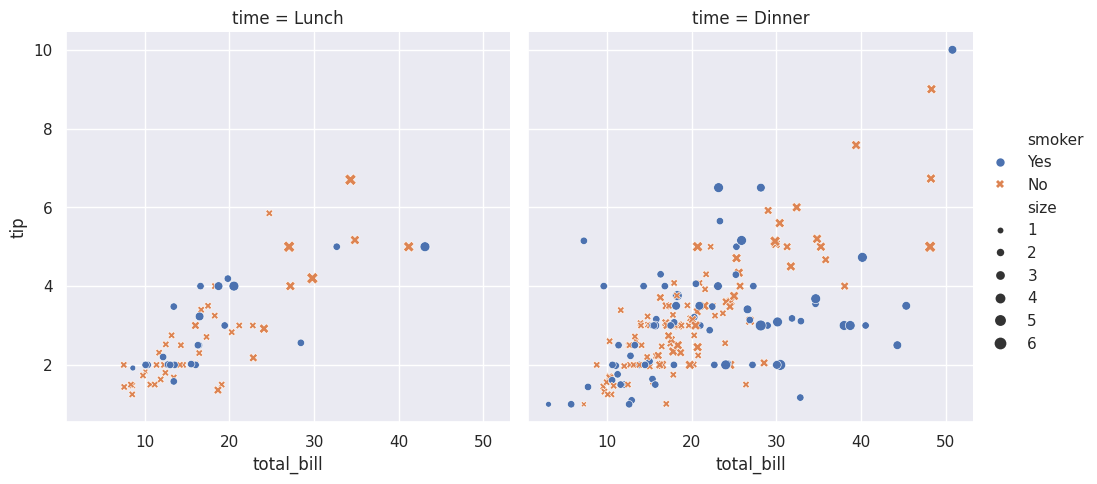

In [1]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
tips.shape

(244, 7)

In [5]:
import pandas as pd

In [6]:
netflix = pd.read_csv("./data/netflix_titles.csv")

In [15]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
moviesByYear = pd.DataFrame(netflix.groupby("release_year")["show_id"].count())
# Renaming the column
moviesByYear.rename(columns={"show_id": "nrShows"}, inplace=True)
moviesByYear.head()

,nrShows
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4


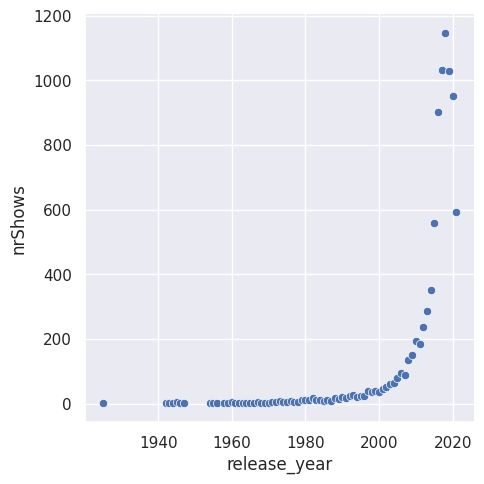

In [10]:
# Create a visualization
sns.relplot(
    data=moviesByYear,
    x="release_year", y="nrShows",
)

In [11]:
netflix["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [12]:
grouped = netflix.groupby(['release_year', 'type']).size().unstack(fill_value=0)

In [13]:
grouped.head()

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1


In [25]:
grouped = netflix.groupby(['release_year', 'type']).size()
grouped.head()


release_year  type   
1925          TV Show    1
1942          Movie      2
1943          Movie      3
1944          Movie      3
1945          Movie      3
dtype: int64

In [26]:

# Assuming 'netflix' is your DataFrame
grouped = netflix.groupby(['release_year', 'type']).size().reset_index(level='type', name='count')
grouped.head()

,type,count
release_year,,
1925,TV Show,1
1942,Movie,2
1943,Movie,3
1944,Movie,3
1945,Movie,3


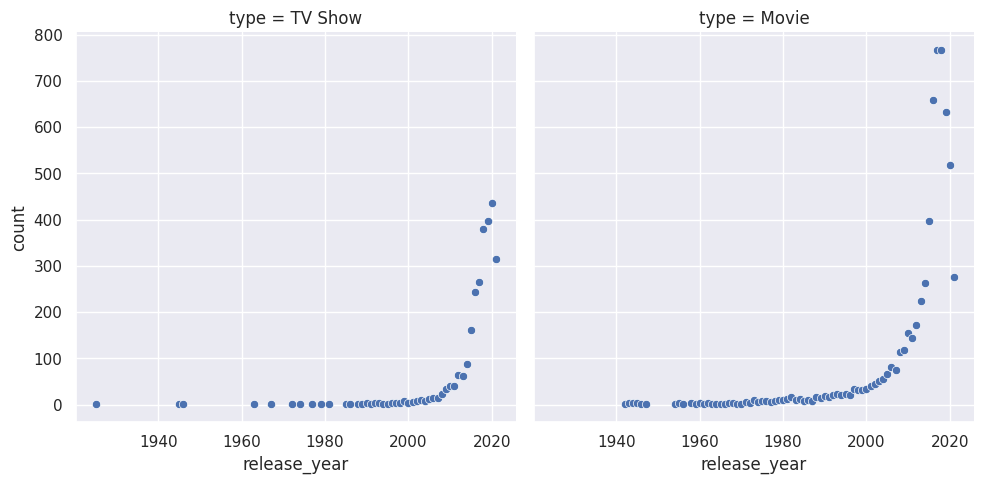

In [27]:
sns.relplot(
    data=grouped,
    x='release_year',
    y  = 'count',
    col='type',
)

In [28]:
filtered_netflix = netflix.dropna(subset=['director'])

filtered_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [72]:
bydirector = filtered_netflix.groupby([ 'director','release_year',]).size()
bydirector = bydirector.reset_index().head()
bydirector.head()

,director,release_year,0
0,A. L. Vijay,2016,1
1,A. L. Vijay,2019,1
2,A. Raajdheep,2020,1
3,A. Salaam,1975,1
4,A.R. Murugadoss,2017,1


In [97]:

# Function to calculate the number of movies released in the last 10 years
def movies_last_10_years(df, director, year):
    #print("director" + director)
    #print("year: " + year.__str__())
    start_year = year - 10
    countit = df[(df['director'] == director) & (df['release_year'] > start_year) & (df['release_year'] <= year)]
    #countit.head()
    #print(countit[0].sum())
    return countit[0].sum()

#nr =movies_last_10_years(bydirector, 'A. L. Vijay', 2019)
#nr
#df = bydirector
#sel = df[(df['director'] == 'A. L. Vijay') & (df['release_year'] > 2000) & (df['release_year'] <= 2020)]
#sel.head()
bydirector['movies_last_10_years'] = bydirector.apply(lambda row: movies_last_10_years(bydirector, row['director'], row['release_year']), axis=1)


,director,release_year,0,movies_last_10_years
0,A. L. Vijay,2016,1,1
1,A. L. Vijay,2019,1,2
2,A. Raajdheep,2020,1,1
3,A. Salaam,1975,1,1
4,A.R. Murugadoss,2017,1,1


In [47]:
bydirector.reset_index(level='director').sort_index().head()

,director,0
release_year,,
1942,Frank Capra,1
1942,John Ford,1
1943,"Frank Capra, Anatole Litvak",1
1943,John Huston,1
1943,John Ford,1
